In [95]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [96]:
from google.colab import files
df= files.upload()

Saving train (2).csv to train (2) (2).csv


In [97]:
import io
df = pd.read_csv(io.BytesIO(df['train (2).csv']))

In [98]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [99]:
df.shape

(891, 12)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [101]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [102]:
df.drop(['PassengerId','Cabin','Embarked','Name','Ticket'],axis=1,inplace=True)



In [103]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [104]:
genders=["female", "male"]
gender=[0,1]

df['Sex'] = df['Sex'].replace(genders, gender)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [105]:
mean_value=df['Age'].mean()
df['Age'].fillna(value=mean_value, inplace=True)

In [106]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [107]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000


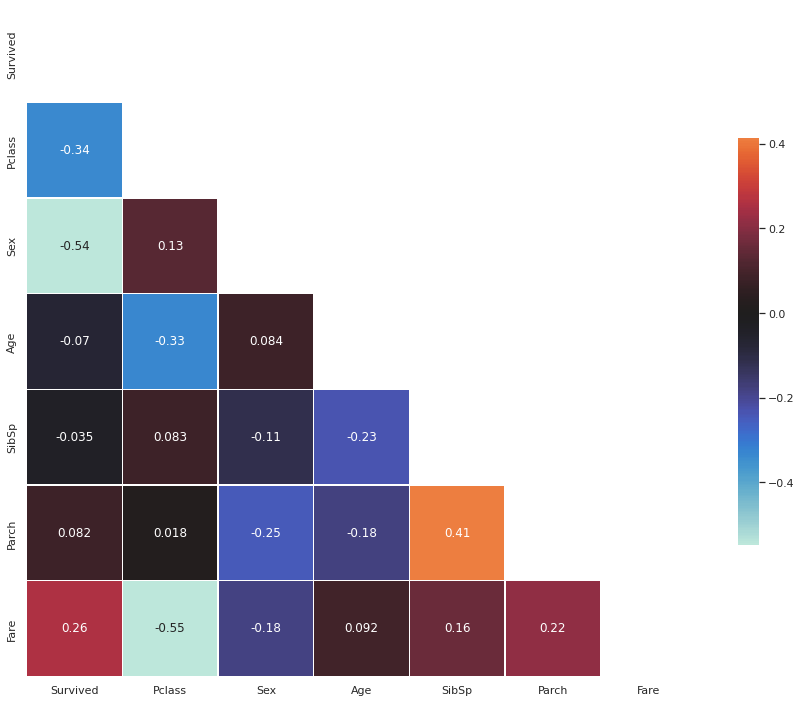

In [108]:
sns.set_theme(style="white")

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(230, 20)

sns.heatmap(corr, mask=mask, center=0, annot=True,
            square=True, linewidths=.3,cbar_kws={"shrink": 0.5})

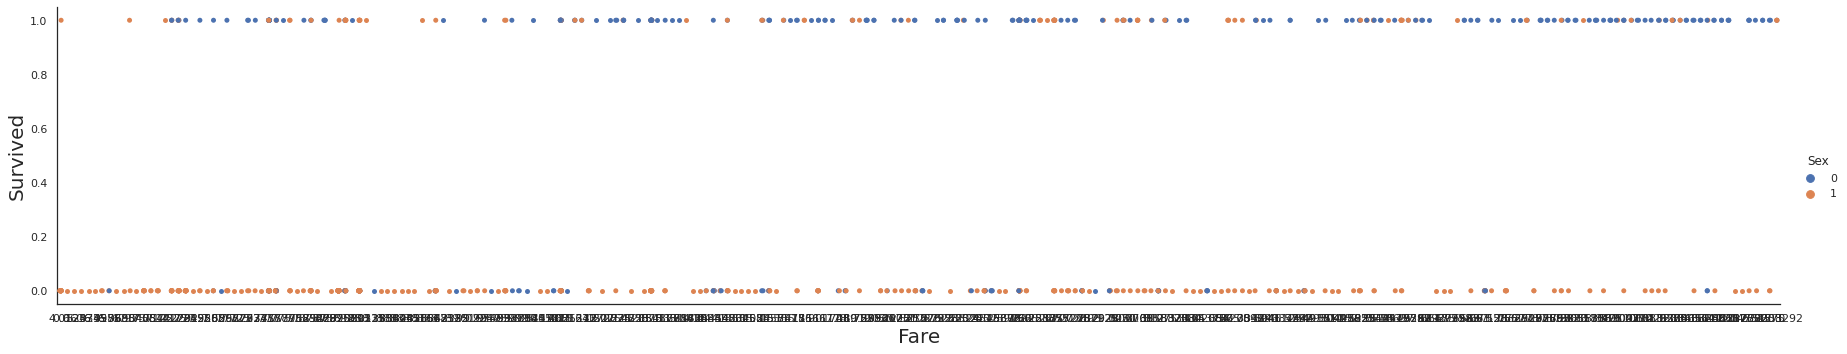

In [109]:
sns.catplot(y="Survived", x="Fare", hue="Sex", data=df, aspect = 5)
plt.xlabel("Fare",fontsize=20)
plt.ylabel("Survived",fontsize=20)
plt.show()

In [135]:
df["Sex"].value_counts()


1    577
0    314
Name: Sex, dtype: int64

In [146]:
def percentage(part, whole):
  percentage = round(100 * float(part)/float(whole))
  return str(percentage) + "%"

print(percentage(3, 5))

60%


In [148]:
male_perc=percentage(577,891)
female_perc=percentage(314,891)

In [152]:
print('Male percentage :', male_perc)
print('Female percentage :', female_perc)

Male percentage : 65%
Female percentage : 35%


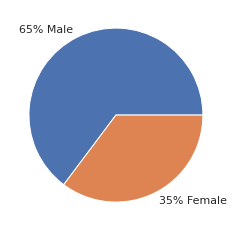

In [144]:
y = np.array([577, 314])
mylabels = ["65% Male", "35% Female"]
mycolors = ["blue", "hotpink"]
plt.pie(y, labels = mylabels)

plt.show() 

In [136]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [155]:
dead_perc=percentage(549,891)
survived_perc=percentage(342,891)

In [156]:
print('Dead percentage :', dead_perc)
print('Survived percentage :', survived_perc)

Dead percentage : 62%
Survived percentage : 38%


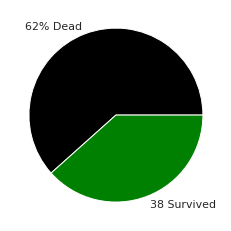

In [157]:
y = np.array([549, 342])
mylabels = ["62% Dead", "38 Survived"]
mycolors = ["black", "Green"]

plt.pie(y, labels = mylabels, colors = mycolors)
plt.show() 

In [110]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Validation set:', X_test.shape,  y_test.shape)

Train set: (712, 6) (712,)
Validation set: (179, 6) (179,)


In [112]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 

In [113]:
def model_evaluation(model, X_train, y_train, X_test, y_test):
    
    
    
    ss = StandardScaler()
    X_train_ss = ss.fit_transform(X_train)
    X_test_ss = ss.fit_transform(X_test)
    print("Scaling process is done ...")
    
    print("**********************************")
    
    print("Model building process is started ...")
    mod = model.fit(X_train, y_train)
    mod_pred = model.predict(X_test)
    print("Model creation process is done ...")
    print("**********************************")
    print("Evaluation of the Model")
    print("***********************************")
    
    print("Classification report of the Model: \n {}".format(classification_report(y_test, mod_pred)))
    print("Confusion Matrix of the given Model: \n {}".format(confusion_matrix(y_test, mod_pred)))
    plot_confusion_matrix(y_test,mod_pred)
    print("Accuracy score of the Model: \n{}".format(accuracy_score(y_test, mod_pred)))
    
    print("Evaluation process is done ...")
    
    print("***********************************************")
    
    return mod

Scaling process is done ...
**********************************
Model building process is started ...
Model creation process is done ...
**********************************
Evaluation of the Model
***********************************
Classification report of the Model: 
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       119
           1       0.72      0.70      0.71        60

    accuracy                           0.81       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix of the given Model: 
 [[103  16]
 [ 18  42]]
Accuracy score of the Model: 
0.8100558659217877
Evaluation process is done ...
***********************************************


DecisionTreeClassifier()

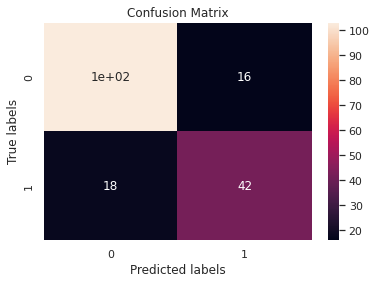

In [114]:
dtc = DecisionTreeClassifier()
model_evaluation(dtc, X_train, y_train, X_test, y_test)

Scaling process is done ...
**********************************
Model building process is started ...
Model creation process is done ...
**********************************
Evaluation of the Model
***********************************
Classification report of the Model: 
               precision    recall  f1-score   support

           0       0.72      0.91      0.80       119
           1       0.61      0.28      0.39        60

    accuracy                           0.70       179
   macro avg       0.66      0.60      0.59       179
weighted avg       0.68      0.70      0.66       179

Confusion Matrix of the given Model: 
 [[108  11]
 [ 43  17]]
Accuracy score of the Model: 
0.6983240223463687
Evaluation process is done ...
***********************************************


SVC()

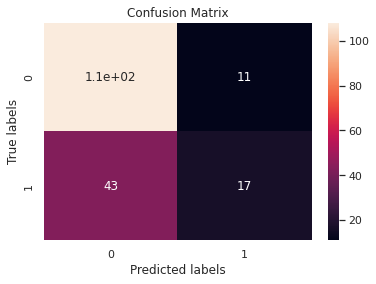

In [115]:
svc = SVC()
model_evaluation(svc, X_train, y_train, X_test, y_test)

Scaling process is done ...
**********************************
Model building process is started ...
Model creation process is done ...
**********************************
Evaluation of the Model
***********************************
Classification report of the Model: 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       119
           1       0.64      0.65      0.64        60

    accuracy                           0.76       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.76      0.76      0.76       179

Confusion Matrix of the given Model: 
 [[97 22]
 [21 39]]
Accuracy score of the Model: 
0.7597765363128491
Evaluation process is done ...
***********************************************


KNeighborsClassifier()

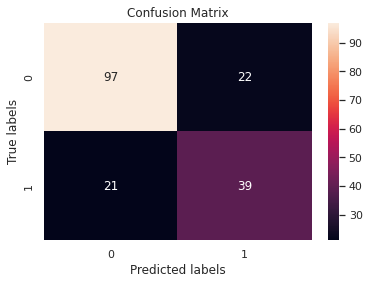

In [116]:
KNN =KNeighborsClassifier()
model_evaluation(KNN, X_train, y_train, X_test, y_test)

Scaling process is done ...
**********************************
Model building process is started ...
Model creation process is done ...
**********************************
Evaluation of the Model
***********************************
Classification report of the Model: 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       119
           1       0.75      0.73      0.74        60

    accuracy                           0.83       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.83      0.83      0.83       179

Confusion Matrix of the given Model: 
 [[104  15]
 [ 16  44]]
Accuracy score of the Model: 
0.8268156424581006
Evaluation process is done ...
***********************************************


RandomForestClassifier()

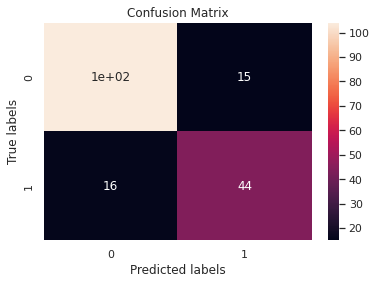

In [117]:
rfc = RandomForestClassifier()
model_evaluation(rfc, X_train, y_train, X_test, y_test)

Scaling process is done ...
**********************************
Model building process is started ...
Model creation process is done ...
**********************************
Evaluation of the Model
***********************************
Classification report of the Model: 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       119
           1       0.80      0.65      0.72        60

    accuracy                           0.83       179
   macro avg       0.82      0.78      0.80       179
weighted avg       0.82      0.83      0.82       179

Confusion Matrix of the given Model: 
 [[109  10]
 [ 21  39]]
Accuracy score of the Model: 
0.8268156424581006
Evaluation process is done ...
***********************************************


LogisticRegression()

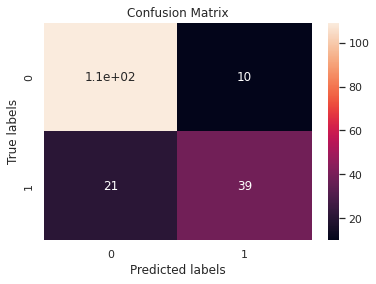

In [118]:
lr=LogisticRegression()
model_evaluation(lr, X_train, y_train, X_test, y_test)

In [119]:
knn_acc=accuracy_score(y_test, KNN.predict(X_test))
dtc_acc=accuracy_score(y_test, dtc.predict(X_test))
lr_acc=accuracy_score(y_test, lr.predict(X_test))
svc_acc=accuracy_score(y_test, svc.predict(X_test))
rfc_acc=accuracy_score(y_test, rfc.predict(X_test))
models = pd.DataFrame({
    'Model': ['KNN','SVC','lr','rfc','dtc'],
    'Score': [knn_acc, svc_acc, lr_acc, rfc_acc, dtc_acc]})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,lr,0.826816
3,rfc,0.826816
4,dtc,0.810056
0,KNN,0.759777
1,SVC,0.698324


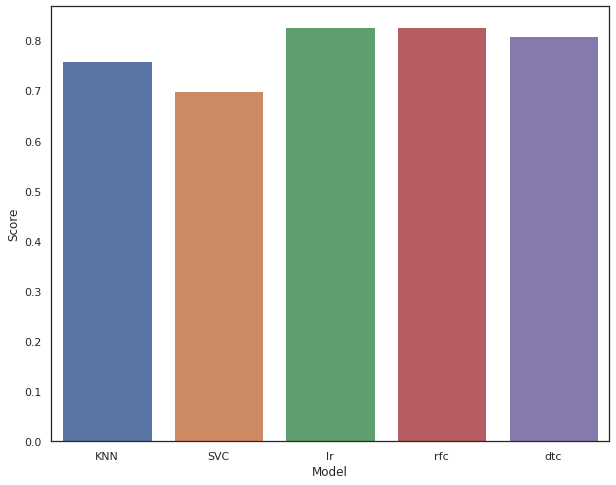

In [120]:
plt.figure(figsize=(10,8))
sns.barplot(x='Model',y='Score',data=models)

In [121]:
#So we can tell that Logregression is the best algorithm as it posses the highest accuracy

In [122]:
from google.colab import files
df1= files.upload()

Saving test (1).csv to test (1) (5).csv


In [123]:
import io
df1 = pd.read_csv(io.BytesIO(df1['test (1).csv']))

In [124]:
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [125]:
genders=["female", "male"]
gender=[0,1]
df1['Sex'] = df1['Sex'].replace(genders, gender)
mean_value=df['Age'].mean()
df1['Age'].fillna(value=mean_value, inplace=True)


In [126]:
df1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [127]:
mean_value1=df['Fare'].mean()
df1['Fare'].fillna(value=mean_value1, inplace=True)

In [128]:
df1.drop(['PassengerId','Cabin','Embarked','Name','Ticket'],axis=1,inplace=True)

In [129]:
prediction = lr.predict(df1)


In [130]:
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [131]:
from google.colab import files
df1= files.upload()

Saving test (1).csv to test (1) (6).csv


In [132]:
import io
df1 = pd.read_csv(io.BytesIO(df1['test (1).csv']))

In [133]:
d = {'PassengerId': df1['PassengerId'] ,'Name': df1['Name'] , 'Survived': prediction}
results = pd.DataFrame(data=d)
results

,PassengerId,Name,Survived
0,892,"Kelly, Mr. James",0
1,893,"Wilkes, Mrs. James (Ellen Needs)",0
2,894,"Myles, Mr. Thomas Francis",0
3,895,"Wirz, Mr. Albert",0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1
...,...,...,...
413,1305,"Spector, Mr. Woolf",0
414,1306,"Oliva y Ocana, Dona. Fermina",1
415,1307,"Saether, Mr. Simon Sivertsen",0
416,1308,"Ware, Mr. Frederick",0


In [134]:
results.to_csv('results.csv', index=False)